# Customer Churn Classification

# 1.Business Understanding

Customer churn, the loss of customers, poses a significant challenge in the competitive telecommunications industry. Retaining customers is vital for sustained growth, as they have numerous options and changing preferences. This project leverages Supervised Machine Learning (classification) to predict churn and provide actionable insights for retention.

The churn analytics predictive model identifies at-risk customers, enabling companies to implement targeted strategies to reduce churn rates. By analyzing customer behavior, preferences, and patterns, businesses can create personalized offers and proactive support initiatives, enhancing satisfaction and loyalty.

Using models like logistic regression,KNN, decision trees,random forests, svm, Gradient Boosting, and XGBoosting and evaluating which model performs better by considering metrics such as accuracy, precision, recall, and F1-score. This data-driven approach empowers businesses to optimize retention efforts, gain a competitive edge, and achieve sustainable growth.

# Research Questions

1.How does customer tenure relate to churn rates? Are long-tenured customers more likely to stay with the company, and do new customers exhibit higher churn behavior?

2.Is there a correlation between the total charges and churn rates? Do customers with higher total charges exhibit different churn behavior compared to those with lower total charges

3.What is the impact of contract type on churn rates? Do customers on long-term contracts have significantly lower churn rates compared to those on short-term contracts?

4.Are there significant differences in churn behavior between customers who have device protection and those who don't?

5.What is the relationship between the availability of tech support and churn rates? Are customers with access to tech support more likely to remain with the company?

6.Do streaming services play a role in customer churn? Are customers with streaming services, such as StreamingTV and StreamingMovies, more likely to stay with the company?

7.How does the choice of payment method impact churn rates? Are customers with specific payment methods more prone to churn than others?

# 2. Data Understanding

# Data Description

Feature Name  :     Description                                                                              Data Type
customerID          Contains customer ID                                                                     categorical
gender              whether the customer female or male                                                      categorical
SeniorCitizen       Whether the customer is a senior citizen or not (1, 0)                                   numeric, int
Partner             Whether the customer has a partner or not (Yes, No)                                      categorical
Dependents          Whether the customer has dependents or not (Yes, No)                                     categorical
tenure              Number of months the customer has stayed with the company                                numeric, int
PhoneService        Whether the customer has a phone service or not (Yes, No)                                categorical
MultipleLines       Whether the customer has multiple lines r not (Yes, No, No phone service)                categorical
InternetService     Customer’s internet service provider (DSL, Fiber optic, No)                              categorical
OnlineSecurity      Whether the customer has online security or not (Yes, No, No internet service)           categorical
OnlineBackup        Whether the customer has online backup or not (Yes, No, No internet service)             categorical
DeviceProtection    Whether the customer has device protection or not (Yes, No, No internet service)         categorical
TechSupport         Whether the customer has tech support or not (Yes, No, No internet service)              categorical
streamingTV         Whether the customer has streaming TV or not (Yes, No, No internet service)              categorical
streamingMovies     Whether the customer has streaming movies or not (Yes, No, No internet service)          categorical
Contract            The contract term of the customer (Month-to-month, One year, Two year)                   categorical
PaperlessBilling    Whether the customer has paperless billing or not (Yes, No)                              categorical
PaymentMethod       The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card)categorical
MonthlyCharges      The amount charged to the customer monthly                                               numeric, int
TotalCharges        The total amount charged to the customer                                                 object
Churn               Whether the customer churned or not (Yes or No)                                          categorical


# Import libraries and Packages

In [1]:
#Data handling , visualization and EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mutual_info_score
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import SMOTE

import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# ML Models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_val_score

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

#Other packages
import os, joblib
from joblib import load

In [2]:
df = pd.read_csv('customer_churn.csv')
df.shape

(7043, 21)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Removing 'customerID' since it has no impact on the churn 

In [5]:
df.drop('customerID', axis='columns', inplace=True)

Checking for Null values

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Since "Total charges" is in object datatype we need to convert it to numeric 

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [8]:
df =df[pd.to_numeric(df.TotalCharges, errors='coerce').notnull()]

In [9]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [10]:
df.describe(include=['object']).T

,count,unique,top,freq
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094
TechSupport,7032,3,No,3472


In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


tenure


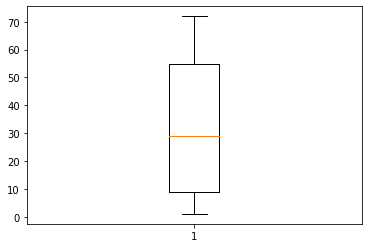

MonthlyCharges


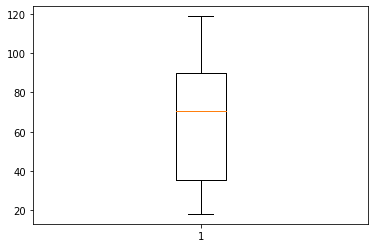

TotalCharges


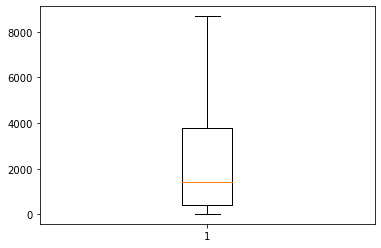

In [12]:
# Check for outliers in the numerical variables
# Use boxplot

for col in ['tenure','MonthlyCharges','TotalCharges']:
    print(col)
    plt.boxplot(df[col])
    plt.show()

In [13]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [14]:
df.shape

(7032, 20)

No outliers in out Test Dataset numeric columns

# EDA

In [15]:
# EDA (pandas-profiling, etc. )
from statsmodels.genmod.families import Binomial
from scipy.stats import pointbiserialr
import scipy.stats as stats

1.How does customer tenure relate to churn rates? Are long-tenured customers more likely to stay with the company, and do new customers exhibit higher churn behavior?

Hypothesis Testing
Null Hypothesis (H0): "There is no significant relationship between customer tenure and churn rate in the telecom company."

Alternative Hypothesis (Ha): "There is a significant relationship between customer tenure and churn rate in the telecom company."

We want to find the correlation between tenure and churn rates. Since churn rate is a binary outcome, we want to use a point-biserial correlation coefficient to assess the significance of the relationship.

In [16]:
# 'Churn' should be a binary variable (0 for no churn, 1 for churn)

df_correlation = df.copy()
df_correlation['Churn'] = df_correlation['Churn'].replace({'No': 0, 'Yes': 1})

# Calculate point-biserial correlation coefficient
correlation_coefficient, p_value = stats.pointbiserialr(df_correlation['Churn'], df_correlation['tenure'])

# Print the results
print(f"Point-Biserial Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Set the significance level (5%)
alpha = 0.05

# Determine if the correlation is statistically significant
if p_value < alpha:
    print("There is a significant correlation between customer tenure and churn rate.")
else:
    print("There is no significant correlation between customer tenure and churn rate.")

Point-Biserial Correlation Coefficient: -0.3540
P-value: 0.0000
There is a significant correlation between customer tenure and churn rate.


1.The correlation coefficient of -0.3526 suggests a moderate negative correlation. This means that as customer tenure increases, the churn rate tends to decrease. Customers who have been with the company for a longer period are less likely to churn.

2.The p-value of 0.0000 suggests that there is a strong statistical evidence to reject the null hypothesis (no correlation) in favor of the alternative hypothesis (significant correlation).

# Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

In [17]:
churn_data = df['Churn'].value_counts()
churn_data

No     5163
Yes    1869
Name: Churn, dtype: int64

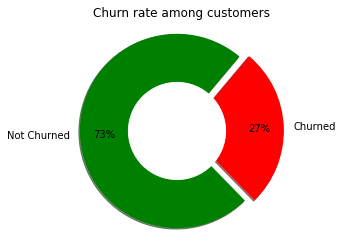

In [18]:
# Create a pie chart using pyplot to visulaize churn rate

plt.figure(figsize=(4, 4))

plt.pie(churn_data, labels=['Not Churned','Churned'], colors=['Green','Red'], startangle=50, shadow=True, radius=2,
     explode=(0,0.2),autopct='%1.0f%%', pctdistance=0.75 ,  )
Circle=plt.Circle((0,0), 1, color='white')
c= plt.gcf()

c.gca().add_artist(Circle)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title('Churn rate among customers')
plt.show()

The target variable is imbalanced, we will balance it  later by using SMOTE technique.

The percentage of customers that did not churn (most majority class) can be used as a baseline to evaluate the quality of the models generated. These models should outperform the baseline capabilities to be considered for future predictions.

# Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

Let's look at the relationship between Churn and Gender

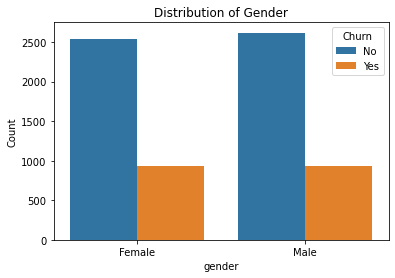

In [19]:
sns.countplot(x='gender',data=df,hue='Churn')
plt.title('Distribution of Gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

The customer gender split is about 50/50 between males and females. no significant difference between gender and churn rate

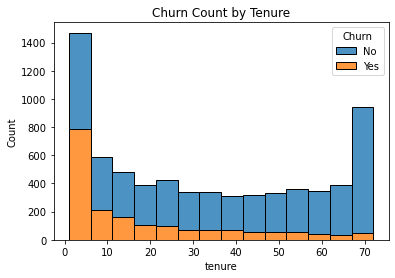

In [20]:
sns.histplot(x='tenure', hue='Churn', data=df, bins=14, alpha=0.8, multiple='stack')
plt.title('Churn Count by Tenure')
plt.show()

Customers with a lower tenure (recent customers) are more likely to churn.
Customers on a longer tenure are less likely to churn.

2. Is there a correlation between the total charges and churn rates? Do customers with higher total charges exhibit different churn behavior compared to those with lower total charges

Correlation coefficient: -0.19948408356756606
P-value: 4.876865689681198e-64


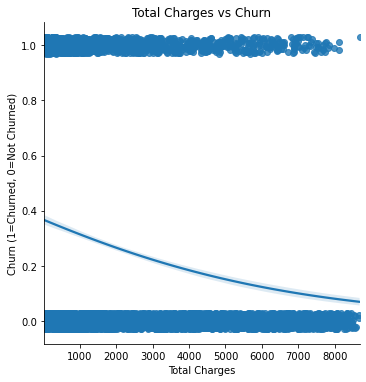

In [21]:
df_temp = df_correlation

# Convert "TotalCharges" column to numeric type and then to integers
df_temp["TotalCharges"] = pd.to_numeric(df_temp["TotalCharges"], errors="coerce", downcast="integer")

# Calculate the point-biserial correlation between TotalCharges and Churn
corr, p_value = pointbiserialr(df_temp["TotalCharges"], df_temp["Churn"])

# Print the correlation coefficient and p-value
print("Correlation coefficient:", corr)
print("P-value:", p_value)

# Plot the data points and visualize the relationship between TotalCharges and Churn
# logistic regression for binary dependent variable (Churn)

sns.lmplot(data=df_temp, x="TotalCharges", y="Churn", logistic=True, y_jitter=.03)
plt.xlabel("Total Charges")
plt.ylabel("Churn (1=Churned, 0=Not Churned)")
plt.title("Total Charges vs Churn")
plt.show()


The analysis shows a weak negative correlation between total charges and churn rates. As total charges increase, the likelihood of churn slightly decreases. The relationship is statistically significant (P-value < 0.05), but the effect is not very strong. Other factors may have a more significant impact on churn behavior.

3. What is the impact of contract type on churn rates? Do customers on long-term contracts have significantly lower churn rates compared to those on short-term contracts?

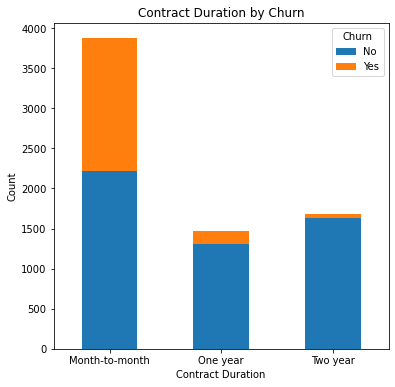

In [22]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(df['Contract'], df['Churn'])

# Plot the stacked bar plot using Seaborn

ax = cross_tab.plot(kind="bar", stacked=True, figsize=(6, 6))
plt.title("Contract Duration by Churn")
plt.xlabel("Contract Duration")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right")
plt.show()

Customers with short term (month-to-month) contracts have higher churn rates than customers with long term (one year+ contracts)
Possible reasons could include price sensitivity, competition, ineffective onboarding, and changing needs. To reduce short-term churn, focus on personalized experiences, competitive pricing, and improving onboarding processes. Building strong customer relationships and demonstrating long-term value can encourage customer loyalty.

4.Are there significant differences in churn behavior between customers who have device protection and those who don't?

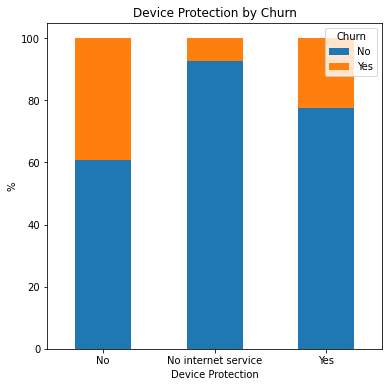

In [23]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(df['DeviceProtection'], df['Churn'])

# Plot the stacked bar plot using Seaborn
percentages = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# Plot the stacked bar plot using Seaborn
ax = percentages.plot(kind="bar", stacked=True, figsize=(6, 6))
plt.title("Device Protection by Churn")
plt.xlabel("Device Protection")
plt.xticks(rotation=0)
plt.ylabel("%")
plt.legend(title="Churn", loc="upper right")


plt.show()

Customers without device protection are slightly more likely to churn, although not significantly enough

5. What is the relationship between the availability of tech support and churn rates? Are customers with access to tech support more likely to remain with the company?

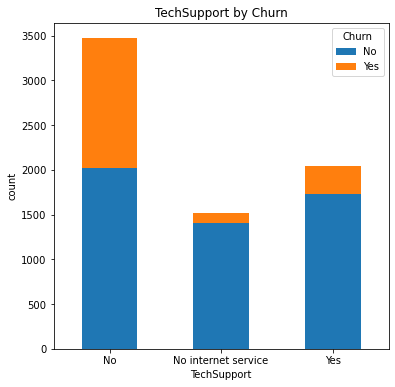

In [24]:
#ceate a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(df['TechSupport'], df['Churn'])

# Plot the stacked bar plot using Seaborn
# sns.set(style="whitegrid")
ax = cross_tab.plot(kind="bar", stacked=True, figsize=(6, 6))
plt.title("TechSupport by Churn")
plt.xlabel("TechSupport")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.legend(title="Churn", loc="upper right")


plt.show()


 we can clearly see that Customers with no tech support were more likely to churn

6. Do streaming services play a role in customer churn? Are customers with streaming services, such as StreamingTV and StreamingMovies, more likely to stay with the company?

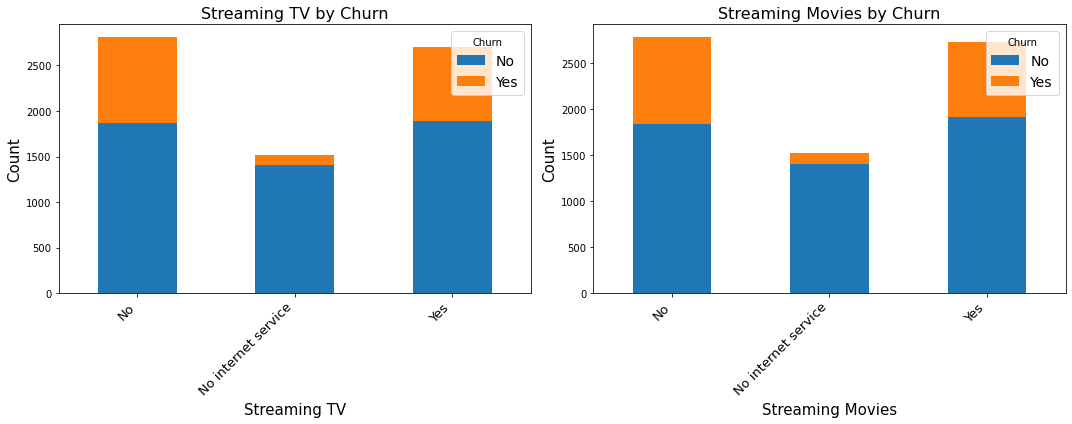

In [25]:
# Create a cross-tabulation (crosstab) of the two categorical columns and 'Churn' column
cross_tab1 = pd.crosstab(df['StreamingTV'], df['Churn'])
cross_tab2 = pd.crosstab(df['StreamingMovies'], df['Churn'])

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the first stacked bar chart
cross_tab1.plot(kind="bar", stacked=True, ax=axes[0])
axes[0].set_title("Streaming TV by Churn", fontsize=16)
axes[0].set_xlabel("Streaming TV", fontsize=15)
axes[0].set_ylabel("Count", fontsize=15)
axes[0].legend(title="Churn", loc="upper right", fontsize=14)

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right', fontsize=13)
# Plot the second stacked bar chart
cross_tab2.plot(kind="bar", stacked=True, ax=axes[1])
axes[1].set_title("Streaming Movies by Churn", fontsize=16)
axes[1].set_xlabel("Streaming Movies",fontsize=15)
axes[1].set_ylabel("Count", fontsize=15)
axes[1].legend(title="Churn", loc="upper right", fontsize=14)

axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right', fontsize=13)
# Adjust layout and display
plt.tight_layout()
plt.show()

No significant relationship between streaming services and churn rates

7. How does the choice of payment method impact churn rates? Are customers with specific payment methods more prone to churn than others?

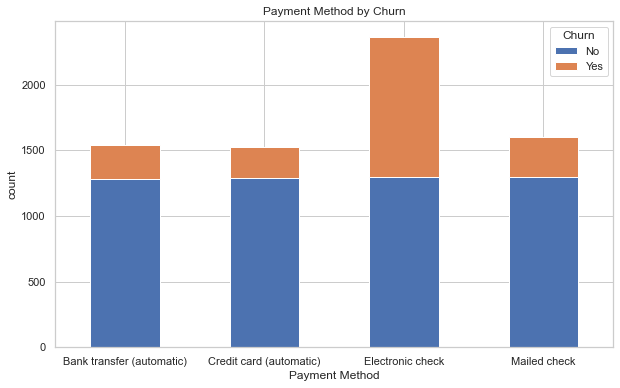

In [26]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(df['PaymentMethod'], df['Churn'])

# Plot the stacked bar plot using Seaborn
sns.set(style="whitegrid")
ax = cross_tab.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Payment Method by Churn")
plt.xlabel("Payment Method")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.legend(title="Churn", loc="upper right")


plt.show()


Customers who pay by electronic check were more likely to churn

# Multivariate Analysis
Lets look at correlation between numeric values and target variable (Churn)

In [27]:
numeric_columns = df_correlation.select_dtypes(include=['int64', 'float64'])
numeric_columns.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000


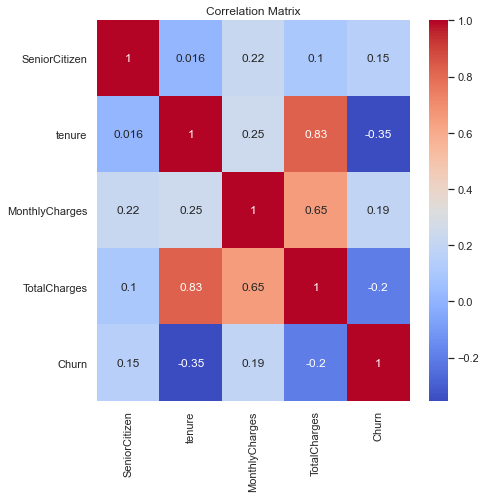

In [28]:
plt.figure(figsize=(7,7))
sns.heatmap(numeric_columns.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

1.tenure vs. Churn: The negative correlation coefficient (-0.352634) indicates a moderate negative linear relationship between the two variables. As 'tenure' (the duration a customer has been with the company) increases, the 'Churn' rate (the likelihood of a customer churning) tends to decrease.

2.MonthlyCharges vs. Churn: The positive correlation coefficient (0.201995) indicates a weak positive linear relationship between the two variables. As 'MonthlyCharges' increase, the 'Churn' rate tends to slightly increase. However, the correlation is not as strong as with 'tenure'.

3.TotalCharges vs. Churn: The negative correlation (-0.194628) suggests a weak negative linear relationship between the two variables. As 'TotalCharges' (the total amount charged to the customer) increases, the 'Churn' rate tends to slightly decrease. However, similar to 'MonthlyCharges', the correlation is not as strong as with 'tenure'.

# Feature Processing & Engineering
Here is the section to clean, process the dataset and create new features.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


# Mutual Information (MI) scores
We calculate the mutual scores between categorical features and the target variable (Churn) in the test dataset. Mutual Information is a measure of the dependence between two variables, which quantifies how much knowing the value of one variable reduces uncertainty about the other variable.

This helps identify which categorical features are more informative in relation to the target variable, making them potentially valuable for predicting or understanding the 'Churn' behavior.

In [30]:
# Lets find out feature dependency on the target variable using mutual information score

x_cat = df.select_dtypes(include=object).drop('Churn', axis=1)
y_cat = df['Churn']

mi_scores = []

for column in x_cat.columns:
    mi_score = mutual_info_score(x_cat[column], y_cat)
    mi_scores.append((column, mi_score))

# sort features by their importance dependency on the target variable, 
# with the most important ones at the top.

mi_scores.sort(key=lambda x: x[1], reverse=True)

for feature, score in mi_scores:
    print(f"{feature} - {score}")


Contract - 0.09818219921734034
OnlineSecurity - 0.06452824152301159
TechSupport - 0.06287279751958623
InternetService - 0.055393693585615335
OnlineBackup - 0.0466589944654092
PaymentMethod - 0.044422924978715875
DeviceProtection - 0.04378428627008563
StreamingMovies - 0.03191837098237602
StreamingTV - 0.03180253675235035
PaperlessBilling - 0.019119265234473853
Dependents - 0.014270326012253198
Partner - 0.011383147791626885
MultipleLines - 0.0007983565971204365
PhoneService - 6.914412223160693e-05
gender - 3.6504338027820715e-05


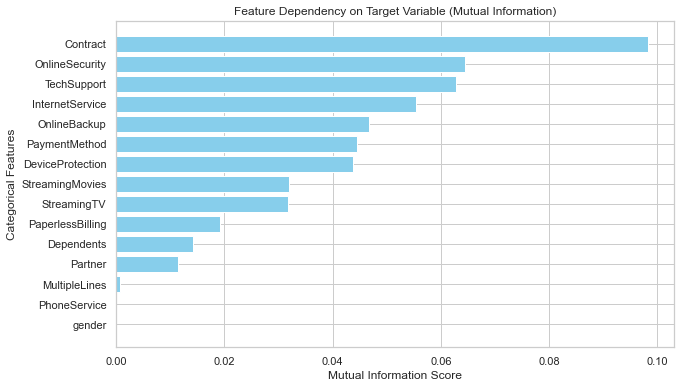

In [31]:

# Extract features and scores
features, scores = zip(*mi_scores)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, scores, color='skyblue')
plt.xlabel('Mutual Information Score')
plt.ylabel('Categorical Features')
plt.title('Feature Dependency on Target Variable (Mutual Information)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important at the top
plt.show()

The gender, Phoneservice and Multiplelines have a very low mutual score (close to 0). This suggests that they have little to no predictive power or relationship with the target variable.
Contract and Online security, TechSupport have the highest mutual scores. 

In [32]:
# drop columns

df.drop(columns=['gender','PhoneService', 'MultipleLines'], inplace=True)

In [33]:
df_encode = df.copy()

In [34]:
X = df_encode.drop(columns=['Churn'])
y = df_encode['Churn']

# Label Encoding

In [35]:
# Encode the target variable (Churn) to have 0 or 1 instead of No or Yes

labelEncoder = LabelEncoder()

y = labelEncoder.fit_transform(y)

In [36]:
(X.shape, y.shape)

((7032, 16), (7032,))

# One-Hot Encoding

In [37]:
# One hot encoding for categorical columns

categorical_columns = [ 'Partner', 'Dependents',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod']

# Create column transformer instance

transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), categorical_columns)
)

transformed_data = transformer.fit_transform(X[categorical_columns])

# Transformating back to a dataframe
transformed_df = pd.DataFrame(transformed_data, columns=transformer.get_feature_names_out())

# One-hot encoding removed an index. Let's put it back
transformed_df.index = X.index

# Joining tables
encoded_df = pd.concat([X, transformed_df], axis=1)

# Dropping old categorical columns
encoded_df.drop(categorical_columns, axis=1, inplace=True)

In [38]:
encoded_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,onehotencoder__Partner_No,onehotencoder__Partner_Yes,onehotencoder__Dependents_No,onehotencoder__Dependents_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No,onehotencoder__OnlineBackup_No internet service,onehotencoder__OnlineBackup_Yes,onehotencoder__DeviceProtection_No,onehotencoder__DeviceProtection_No internet service,onehotencoder__DeviceProtection_Yes,onehotencoder__TechSupport_No,onehotencoder__TechSupport_No internet service,onehotencoder__TechSupport_Yes,onehotencoder__StreamingTV_No,onehotencoder__StreamingTV_No internet service,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_No,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_No,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check
0,0,1,29.85,29.85,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,34,56.95,1889.50,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,2,53.85,108.15,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,45,42.30,1840.75,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [39]:
encoded_df.columns = encoded_df.columns.str.replace('onehotencoder__', '')

In [40]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Partner_No                               7032 non-null   float64
 5   Partner_Yes                              7032 non-null   float64
 6   Dependents_No                            7032 non-null   float64
 7   Dependents_Yes                           7032 non-null   float64
 8   InternetService_DSL                      7032 non-null   float64
 9   InternetService_Fiber optic              7032 non-null   float64
 10  InternetService_No                       7032 no

# Features Scaling

In [41]:
# standardization for numeric values

cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

encoded_scaled = scaler.fit_transform(encoded_df[cols])

# Create new DataFrames with the scaled values
X_scaled_df = pd.DataFrame(encoded_scaled, columns=cols, index=X.index)

# Drop the original unscaled columns
encoded_df.drop(cols, axis=1, inplace=True)

# Concatenate the scaled columns with the original DataFrames
encoded_df = pd.concat([encoded_df, X_scaled_df], axis=1)

In [42]:

encoded_df.head()

,SeniorCitizen,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.280248,-1.161694,-0.994194
1,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.064303,-0.260878,-0.173740
2,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.239504,-0.363923,-0.959649
3,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.512486,-0.747850,-0.195248
4,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.239504,0.196178,-0.940457


# Train set Balancing (SMOTE Algorithm)
SMOTE (Synthetic Minority Over-sampling Technique) is a method used to address class imbalance in a binary classification problem.

Earlier we realised that our target vaiable has a class imbalance. One class (the minority class) has significantly fewer instances than the other class (the majority class). This imbalance can negatively impact the performance of machine learning models, as they might become biased toward the majority class.

SMOTE will aim to balance the class distribution by generating synthetic samples until the minority class has the same number of instances as the majority class. By creating synthetic samples, SMOTE helps the model better capture the patterns in the minority class and prevents it from favoring the majority class due to the imbalance.

In [43]:
encoded_df.shape

(7032, 38)

In [44]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Partner_No                               7032 non-null   float64
 2   Partner_Yes                              7032 non-null   float64
 3   Dependents_No                            7032 non-null   float64
 4   Dependents_Yes                           7032 non-null   float64
 5   InternetService_DSL                      7032 non-null   float64
 6   InternetService_Fiber optic              7032 non-null   float64
 7   InternetService_No                       7032 non-null   float64
 8   OnlineSecurity_No                        7032 non-null   float64
 9   OnlineSecurity_No internet service       7032 non-null   float64
 10  OnlineSecurity_Yes                       7032 no

In [45]:
smote = SMOTE(random_state=42, k_neighbors=5, sampling_strategy='auto')

X_resampled, y_resampled = smote.fit_resample(encoded_df, y)

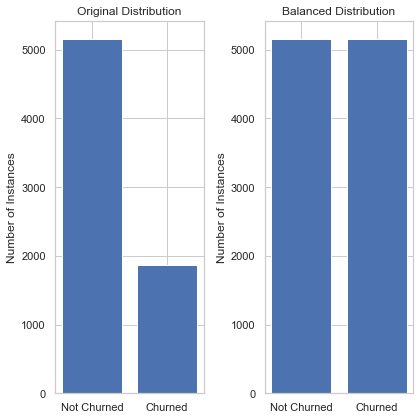

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(6, 6))

# Plot the first bar graph for the original distribution
unique, counts = np.unique(y, return_counts=True)
axes[0].bar(unique, counts)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Not Churned', 'Churned'])
axes[0].set_ylabel('Number of Instances')
axes[0].set_title('Original Distribution')

# Plot the second bar graph for a separate y value
unique2, counts2 = np.unique(y_resampled, return_counts=True) 
axes[1].bar(unique2, counts2)
axes[1].set_xticks([0, 1])  # Adjust as needed
axes[1].set_xticklabels(['Not Churned', 'Churned'])  # Adjust labels
axes[1].set_ylabel('Number of Instances')
axes[1].set_title('Balanced Distribution')

# Adjust spacing between subplots
plt.tight_layout()



Our train dataset is now balaced

Train-test split

In [47]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [48]:
# check shape after resampling

pd.DataFrame(X_train).shape, pd.DataFrame(y_train).shape

((8260, 38), (8260, 1))

In [49]:
# view class distribution

pd.value_counts(pd.Series(y_train))

0    4130
1    4130
dtype: int64

# 4. Modeling and Hyper Parameter Tuning
Here is the section to build, train, evaluate and compare the models to each others.

In [57]:
# Multi-Model Evaluation Function
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="binary")
        recall = recall_score(y_test, y_pred, average="binary")
        f1 = f1_score(y_test, y_pred, average="binary")
        roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

        results[name] = {
            "Accuracy": acc,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC-AUC": roc_auc,
            "Classification Report": classification_report(y_test, y_pred, output_dict=True),
        }

        # Print metrics
        print(f"Model: {name}")
        print(f"Accuracy: {acc}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        if roc_auc is not None:
            print(f"ROC-AUC: {roc_auc}")
        print("\n")
    return results


In [58]:
# Hyperparameter Tuning Function
def hyperparameter_tuning(models, param_grids, X_train, y_train):
    best_models = {}
    for name, model in models.items():
        print(f"Tuning hyperparameters for: {name}")
        search = RandomizedSearchCV(
            model, 
            param_distributions=param_grids[name], 
            n_iter=10, 
            cv=3, 
            scoring='roc_auc', 
            verbose=1, 
            n_jobs=-1,
            random_state=42
        )
        search.fit(X_train, y_train)
        best_models[name] = search.best_estimator_
        print(f"Best parameters for {name}: {search.best_params_}")
        print("\n")
    return best_models

In [59]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)}
    

In [60]:
# Define hyperparameter grids
param_grids = {
    "Logistic Regression": {"C": np.logspace(-3, 3, 5)},
    "KNN": {"n_neighbors": np.arange(1, 10), "weights": ["uniform", "distance"]},
    "SVM": {"C": np.logspace(-2, 2, 4), "kernel": ["linear", "rbf"]},
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5],
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5],
        "colsample_bytree": [ 0.7, 1],
    },
}

In [61]:
# Evaluate default models
print("Evaluating default models...")
default_results = evaluate_models(models, X_train, X_test, y_train, y_test)

Evaluating default models...
Model: Logistic Regression
Accuracy: 0.7681510164569216
Precision: 0.7379725085910653
Recall: 0.8315585672797676
F1 Score: 0.7819754210286755
ROC-AUC: 0.8528459200685229


Model: KNN
Accuracy: 0.7938044530493708
Precision: 0.7410643367752184
Recall: 0.9031945788964182
F1 Score: 0.8141361256544503
ROC-AUC: 0.8661859507501248


Model: SVM
Accuracy: 0.7918683446272992
Precision: 0.7647058823529411
Recall: 0.8431752178121975
F1 Score: 0.802025782688766
ROC-AUC: 0.8714282501272153


Model: Random Forest
Accuracy: 0.8528557599225557
Precision: 0.8416119962511716
Recall: 0.8693126815101646
F1 Score: 0.8552380952380952
ROC-AUC: 0.9152216919113588


Model: Gradient Boosting
Accuracy: 0.8209099709583737
Precision: 0.7920704845814978
Recall: 0.8702807357212003
F1 Score: 0.8293357933579335
ROC-AUC: 0.9075330173959248


Model: XGBoost
Accuracy: 0.8325266214908035
Precision: 0.8207282913165266
Recall: 0.850919651500484
F1 Score: 0.8355513307984791
ROC-AUC: 0.920860396836

In [55]:
# Perform hyperparameter tuning
print("Performing hyperparameter tuning...")
best_models = hyperparameter_tuning(models, param_grids, X_train, y_train)

Performing hyperparameter tuning...
Tuning hyperparameters for: Logistic Regression
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for Logistic Regression: {'C': 1000.0}


Tuning hyperparameters for: KNN
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 8}


Tuning hyperparameters for: SVM
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for SVM: {'kernel': 'rbf', 'C': 100.0}


Tuning hyperparameters for: Random Forest
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 20}


Tuning hyperparameters for: Gradient Boosting
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for Gradient Boosting: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}


Tuning hyperparameters for: XGBoost
Fitting 3 folds for each of 10 candidates,

In [62]:
# Evaluate tuned models
print("Evaluating tuned models...")
tuned_results = evaluate_models(best_models, X_train, X_test, y_train, y_test)

Evaluating tuned models...
Model: Logistic Regression
Accuracy: 0.7686350435624395
Precision: 0.7386070507308684
Recall: 0.8315585672797676
F1 Score: 0.7823315118397085
ROC-AUC: 0.8529124562243636


Model: KNN
Accuracy: 0.8199419167473379
Precision: 0.7724649629018961
Recall: 0.9070667957405615
F1 Score: 0.8343722172751558
ROC-AUC: 0.8889150764369232


Model: SVM
Accuracy: 0.8228460793804453
Precision: 0.8012646793134598
Recall: 0.8586640851887706
F1 Score: 0.8289719626168225
ROC-AUC: 0.8882534633943373


Model: Random Forest
Accuracy: 0.8431752178121975
Precision: 0.8267281105990784
Recall: 0.8683446272991288
F1 Score: 0.8470254957507082
ROC-AUC: 0.9169858371700956


Model: Gradient Boosting
Accuracy: 0.8373668925459826
Precision: 0.8217913204062789
Recall: 0.861568247821878
F1 Score: 0.841209829867675
ROC-AUC: 0.9222234509024083


Model: XGBoost
Accuracy: 0.8431752178121975
Precision: 0.8261269549218031
Recall: 0.8693126815101646
F1 Score: 0.8471698113207548
ROC-AUC: 0.92267327280105

In [64]:

import joblib

# Save the XGBoost model
xgboost_model = best_models.get("XGBoost")  # Extract XGBoost model from tuned results

if xgboost_model:
    joblib.dump(xgboost_model, "xgboost_model.joblib")  # Save the model
    print("XGBoost model saved as xgboost_model.joblib")
else:
    print("XGBoost model is not found in the best_models dictionary.")


XGBoost model saved as xgboost_model.joblib


In [65]:
xgboost_model = joblib.load("xgboost_model.joblib")
print("XGBoost model loaded successfully.")


XGBoost model loaded successfully.


# Conclusion

Number of months the customer has stayed with the company (tenure) and the contract term of the customer (contract) are the most important features that have strong correlation with churn of the customer

Vodafone should enhance Early Customer Experience because in the first 5-10 months, customer tenure shows a higher churn rate, suggesting that customer experience in the initial stages is vital. Focusing on improving onboarding processes, service quality, and addressing customer concerns during this crucial period with tech support can enhance customer satisfaction and loyalty.

Vodafone should Promote Long-Term Contracts, since the analysis indicates that customers with month-to-month contracts have a significantly higher churn rate compared to those with one-year or two-year contracts. Encouraging customers to opt for longer-term contracts through incentives, benefits, and increased tech support can potentially reduce churn rates and foster customer commitment.
Selected XGBoost as the best model for its superior classification accuracy and ROC-AUC score.

Ensemble methods perform well on classification tasks, compared to using single classifiers

Both Random Forests and XGboost performed well.These two models achieved  84% accuracy. But When comapred Random Forest ROC-AUC curve i.e 91 % ,  xgboost ROC-AUC Curve is 92% which is more preferrable.